<img src="https://media-exp1.licdn.com/dms/image/C4D0BAQFf6-LzAW8jUg/company-logo_200_200/0?e=1602115200&v=beta&t=lIkM2SzW5yCTULsgW49JwacZZhm8gNNQkNVcgtqRXwk">

<h1><center>Data Analysis Skill Test</center></h1>

<h2><center>Parte I - Análise Exploratória</center></h2>

In [42]:
# Carregar pacotes
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings("ignore")

# plot no jupyter notebook
%matplotlib inline

# estilo dos gráficos
plt.style.use('seaborn-darkgrid')

In [2]:
# Importar dados
df_comexstat = pd.read_csv('./data/data_comexstat.csv', engine='python')
df_covariates = pd.read_excel('./data/covariates.xlsx', sheet_name=0, header=0)

In [3]:
print(df_comexstat.shape)
df_comexstat.head()

(117965, 8)


,date,product,state,country,type,route,tons,usd
0,1997-01-01,corn,ES,United States,Import,Sea,44.045,113029.0
1,1997-01-01,corn,GO,Argentina,Import,Ground,54.000,36720.0
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0
4,1997-01-01,corn,MG,Argentina,Import,Ground,27.000,18630.0


In [4]:
print(df_covariates.shape)
df_covariates.head()

(52, 13)


,year,price_soybeans,price_corn,price_soybean_meal,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam
0,1979,NaN,NaN,NaN,100.000000,100.000000,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,1980,100.000000,100.000000,100.000000,107.900000,81.200000,100.000000,101.200000,104.600000,102.100000,103.400000,103.200000,96.500000
2,1981,98.525508,103.888308,99.805440,113.402900,74.216800,99.500000,100.795200,110.771400,104.039900,105.674800,107.534400,102.097000
3,1982,83.406192,85.986430,86.596956,123.609161,83.939201,98.206500,102.004742,116.753056,104.664139,113.389060,111.083035,110.468954
4,1983,97.851743,108.168059,98.663318,136.958950,95.522811,99.974217,103.738823,123.291227,107.594735,123.480687,114.970941,118.312250


# Análise Exploratória

In [5]:
df_comexstat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117965 entries, 0 to 117964
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     117965 non-null  object 
 1   product  117965 non-null  object 
 2   state    117965 non-null  object 
 3   country  117965 non-null  object 
 4   type     117965 non-null  object 
 5   route    117965 non-null  object 
 6   tons     117965 non-null  float64
 7   usd      117965 non-null  float64
dtypes: float64(2), object(6)
memory usage: 7.2+ MB


## Características das variaveis

In [6]:
# Periodo de tempo
df_year = pd.DatetimeIndex(df_comexstat['date']).year.unique()
print(min(df_year), max(df_year), len(df_year))

1997 2019 23


In [7]:
# Calsses das variaveis
produtos = df_comexstat['product'].unique()
estados = df_comexstat['state'].unique()
paises = df_comexstat['country'].unique()
rotas = df_comexstat['route'].unique()

print("Produtos:\n nº {}\n{}".format(len(produtos), produtos))
print("\n")
print("Estados:\n nº {}\n{}".format(len(estados), estados))
print("\n")
print("Paises:\n nº {}\n{}".format(len(paises), paises))
print("\n")
print("Rotas:\n nº {}\n{}".format(len(rotas), rotas))
print("\n")

Produtos:
 nº 6
['corn' 'soybean_meal' 'soybean_oil' 'soybeans' 'sugar' 'wheat']


Estados:
 nº 27
['ES' 'GO' 'MG' 'MS' 'PE' 'PR' 'RS' 'SC' 'SP' 'MT' 'RN' 'BA' 'RJ' 'AL'
 'CE' 'DF' 'PB' 'AM' 'PI' 'PA' 'MA' 'TO' 'SE' 'RO' 'AP' 'RR' 'AC']


Paises:
 nº 212
['United States' 'Argentina' 'Bolivia' 'Paraguay' 'Uruguay' 'Netherlands'
 'Ecuador' 'Germany' 'Hungary' 'Bermuda' 'Cameroon' 'Denmark' 'France'
 'Indonesia' 'Italy' 'Panama' 'Philippines' 'Slovenia' 'United Kingdom'
 'Chile' 'China' 'Israel' 'Japan' 'Spain' 'Turkey' 'Bangladesh'
 'Hong Kong' 'India' 'Iran' 'Algeria' 'Gambia' 'Ghana' 'Libya' 'Senegal'
 'Sri Lanka' 'Yemen' 'Nigeria' 'United Arab Emirates' 'Jordan' 'Russia'
 'Tunisia' 'South Africa' 'Mexico' 'Taiwan' 'Morocco' 'Singapore' 'Cuba'
 'Angola' 'Jamaica' 'Peru' 'Colombia' 'Poland' 'Australia' 'Thailand'
 'Malaysia' 'Pakistan' 'Cape Verde' 'Portugal' 'Norway' 'Uzbekistan'
 'Belgium' 'Cayman Islands' 'Croatia' 'Georgia' 'Greece' 'Ireland'
 'South Korea' 'Liechtenstein' 'Netherla

## Evolução das exportações - ton e usd - por estado

In [81]:
# Criar coluna para ano
df_comexstat['year'] = pd.DatetimeIndex(df_comexstat['date']).year

# Filtrar somente exportação
comex_gb_tons_usd_exp = df_comexstat[df_comexstat['type'] == 'Export']

# Agrupar valores de toneladas e preço - ano, produto e estado
comex_gb_tons_usd_exp = comex_gb_tons_usd_exp.groupby(['year','product','state'])['tons','usd'].sum().reset_index()

# Ordenar variaveis
comex_gb_tons_usd_exp = comex_gb_tons_usd_exp.sort_values(['year','product','state'])

In [82]:
# Funcao para visualizar toneladas e preços por estado e produto
def plot_tons_price(dataframe, var_iterate, var_filter):
    # definir tamanho plot
    plt.figure(figsize=(18,16))
    plt.subplots_adjust(hspace=0.5)
    
    # imprimir produto atual
    print("Produto: ", var_filter)
    
    # Iteração para visualizar cada estado
    for i,estado in enumerate(var_iterate):

        ax1 = plt.subplot(9,3,i+1)

        current_df = dataframe[(dataframe['state']==estado) &
                                       (dataframe['product']==var_filter)]
        
        # Plot bar toneladas
        ax1.bar(current_df.year, current_df.tons)
        
        # Plot line preço - eixo y secundário
        ax2 = ax1.twinx()
        ax2.plot(current_df.year,current_df.usd, 'r-o')
        
        # Titulo = estado
        plt.title(estado)

    plt.show()

Produto:  corn


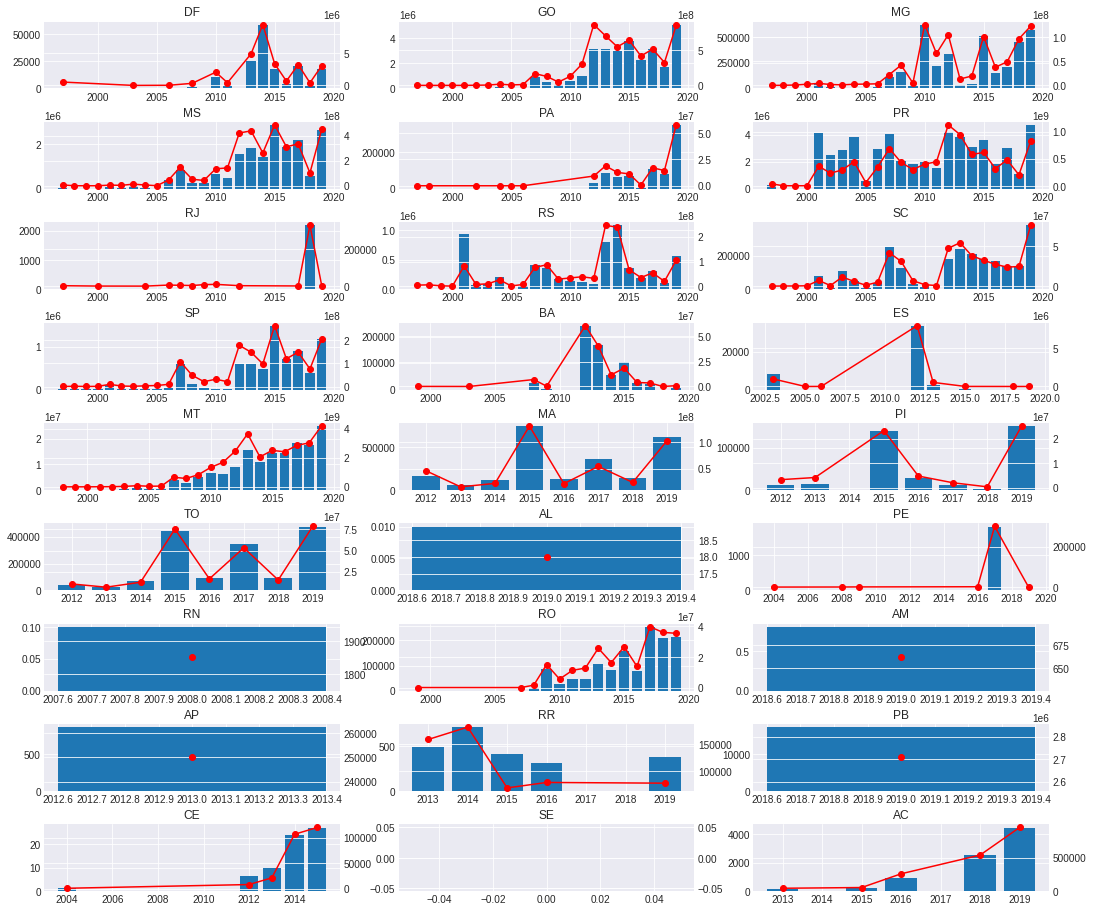

Produto:  soybean_meal


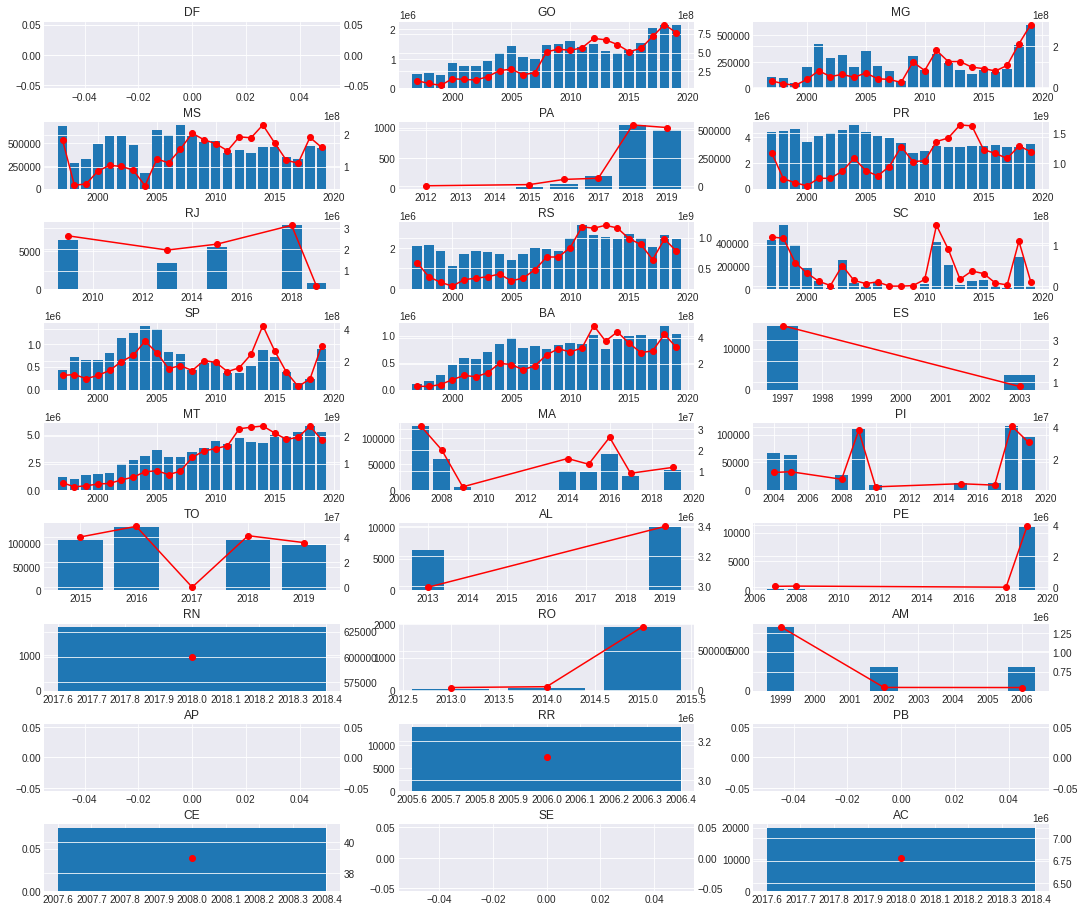

Produto:  soybean_oil


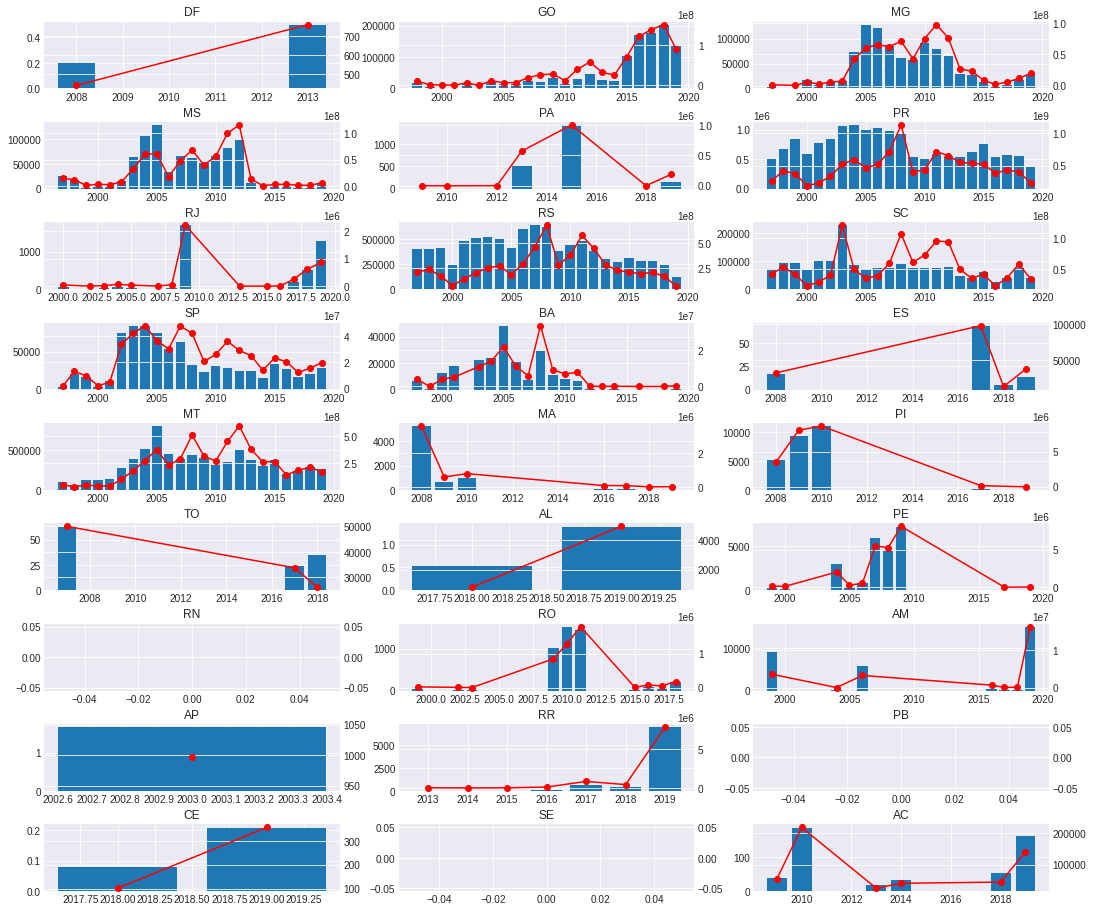

Produto:  soybeans


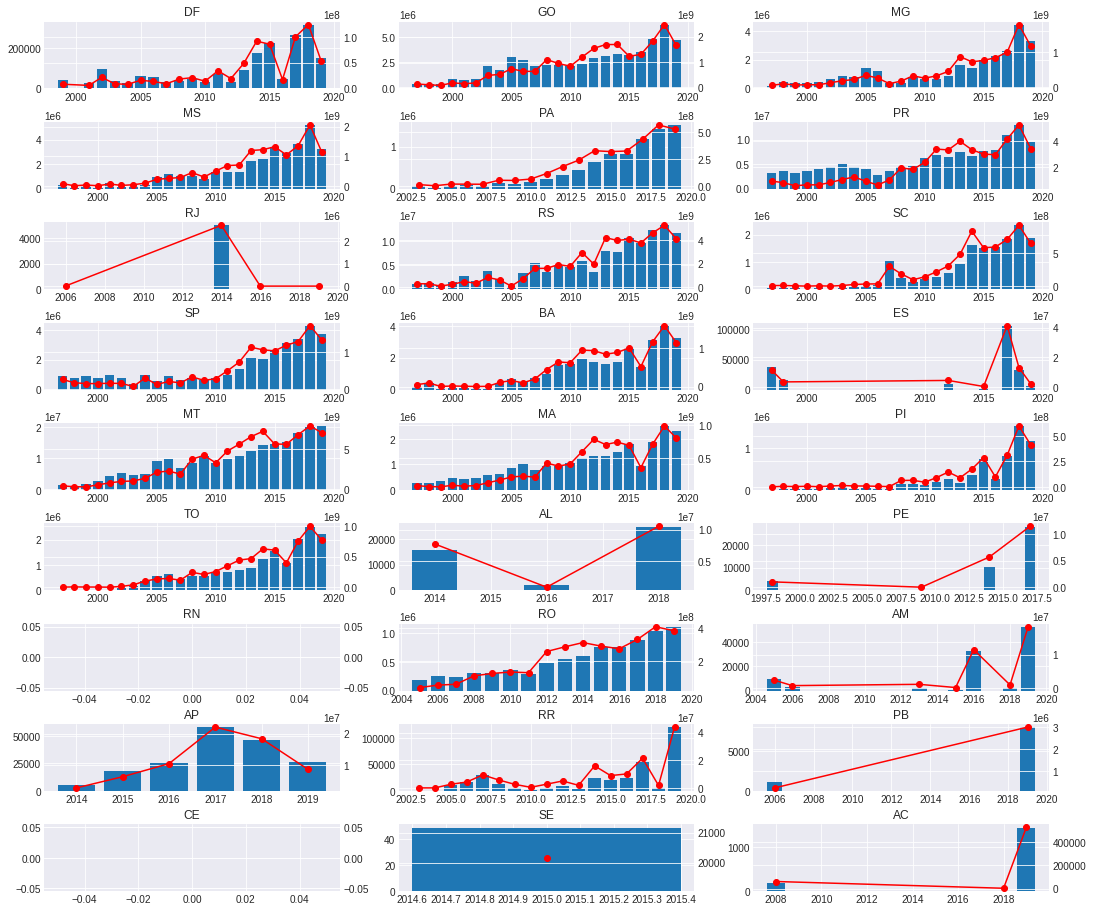

Produto:  sugar


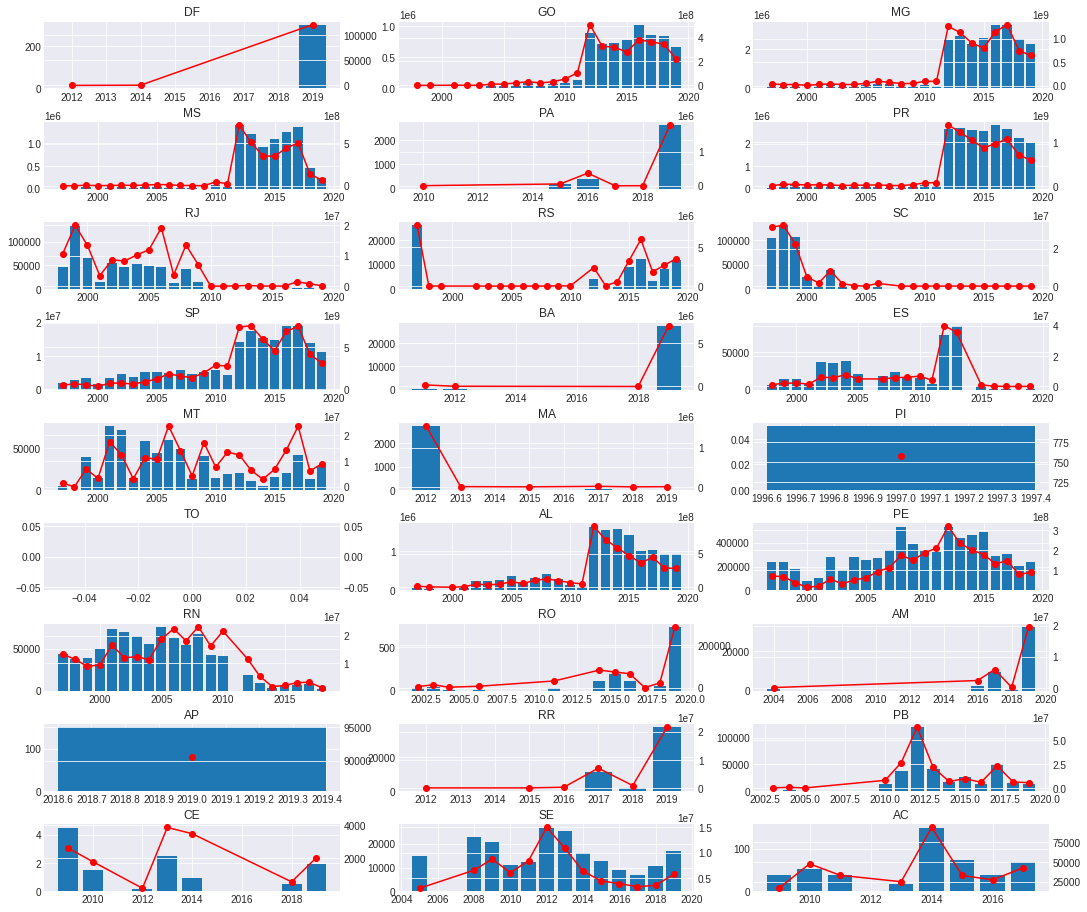

Produto:  wheat


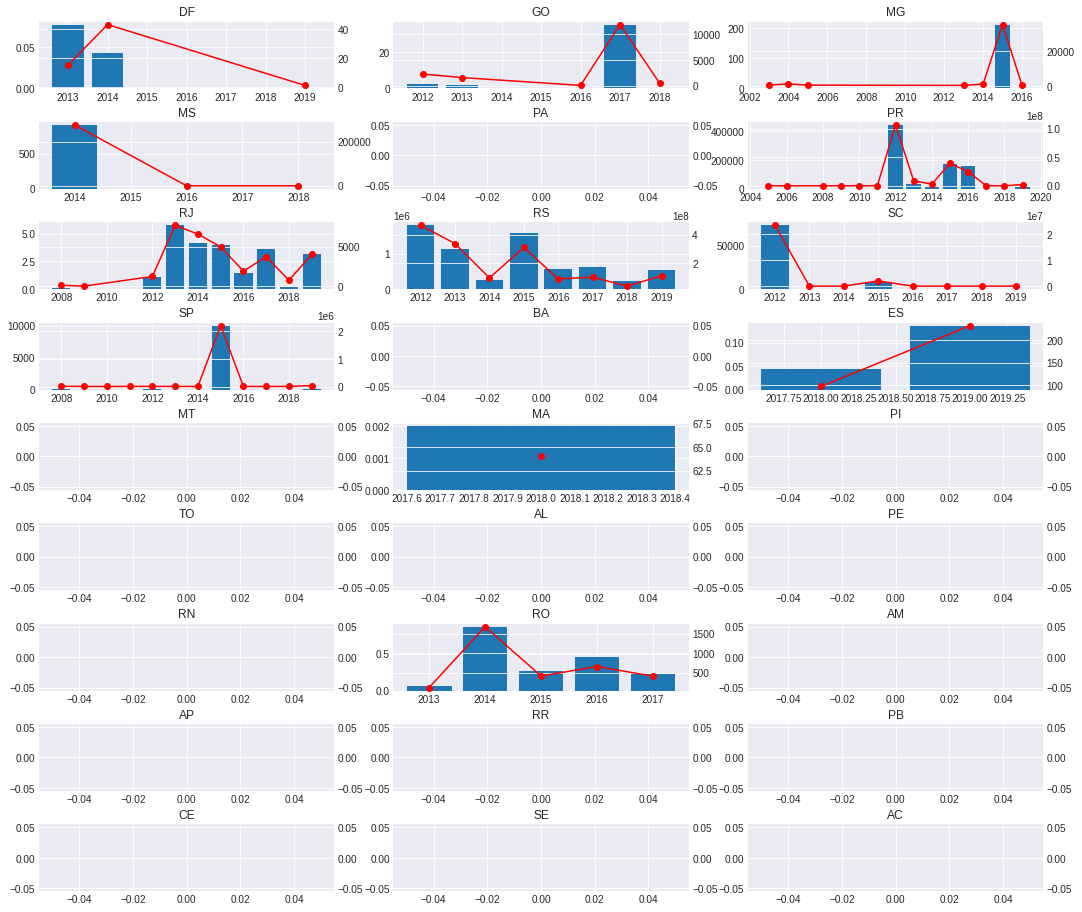

In [83]:
estados = comex_gb_tons_usd_exp['state'].unique()
produtos = comex_gb_tons_usd_exp['product'].unique()

for produto in produtos:
    plot_tons_price(comex_gb_tons_usd_exp, estados, produto)

## Evolução das importações - ton e usd - por estado

In [87]:
# Filtrar somente exportação
comex_gb_tons_usd_imp = df_comexstat[df_comexstat['type'] == 'Import']

# Agrupar valores de toneladas e preço - ano, produto e estado
comex_gb_tons_usd_imp = comex_gb_tons_usd_imp.groupby(['year','product','state'])['tons','usd'].sum().reset_index()

# Ordenar variaveis
comex_gb_tons_usd_imp = comex_gb_tons_usd_imp.sort_values(['year','product','state'])

Produto:  corn


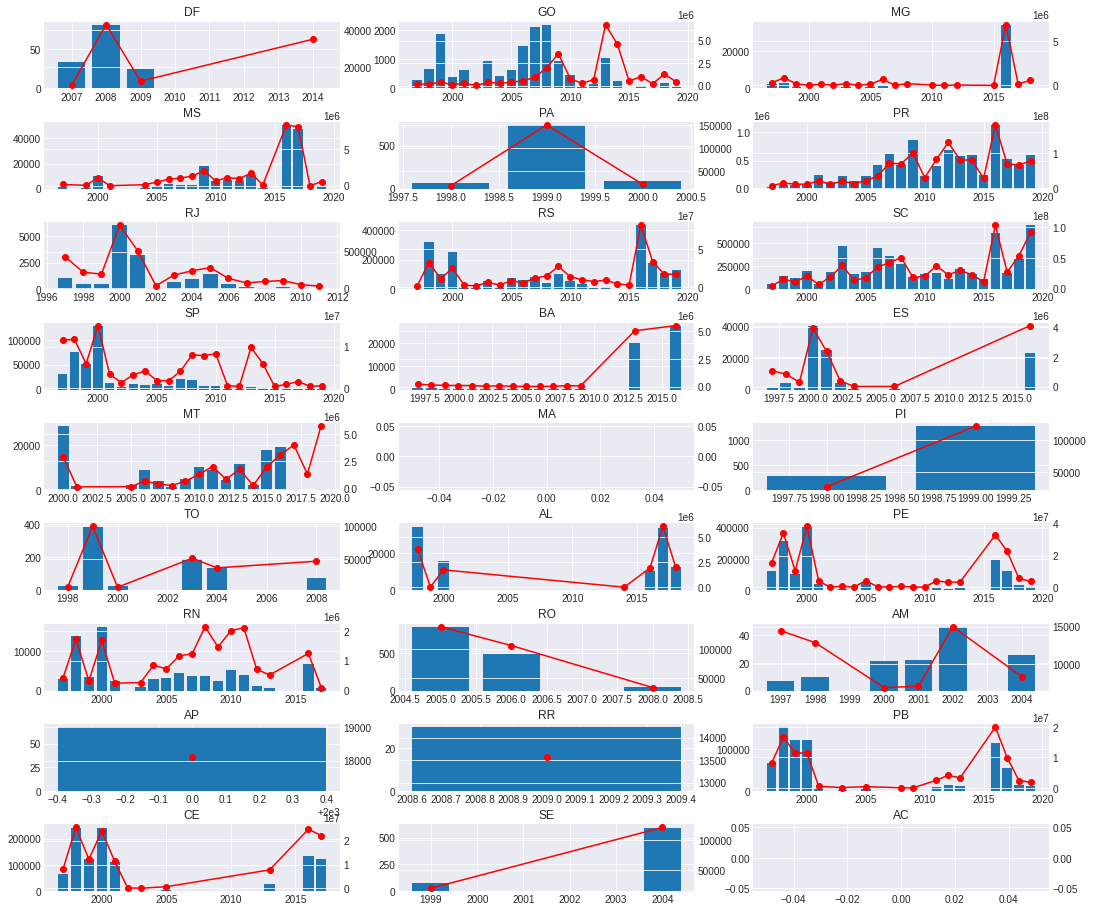

Produto:  soybean_meal


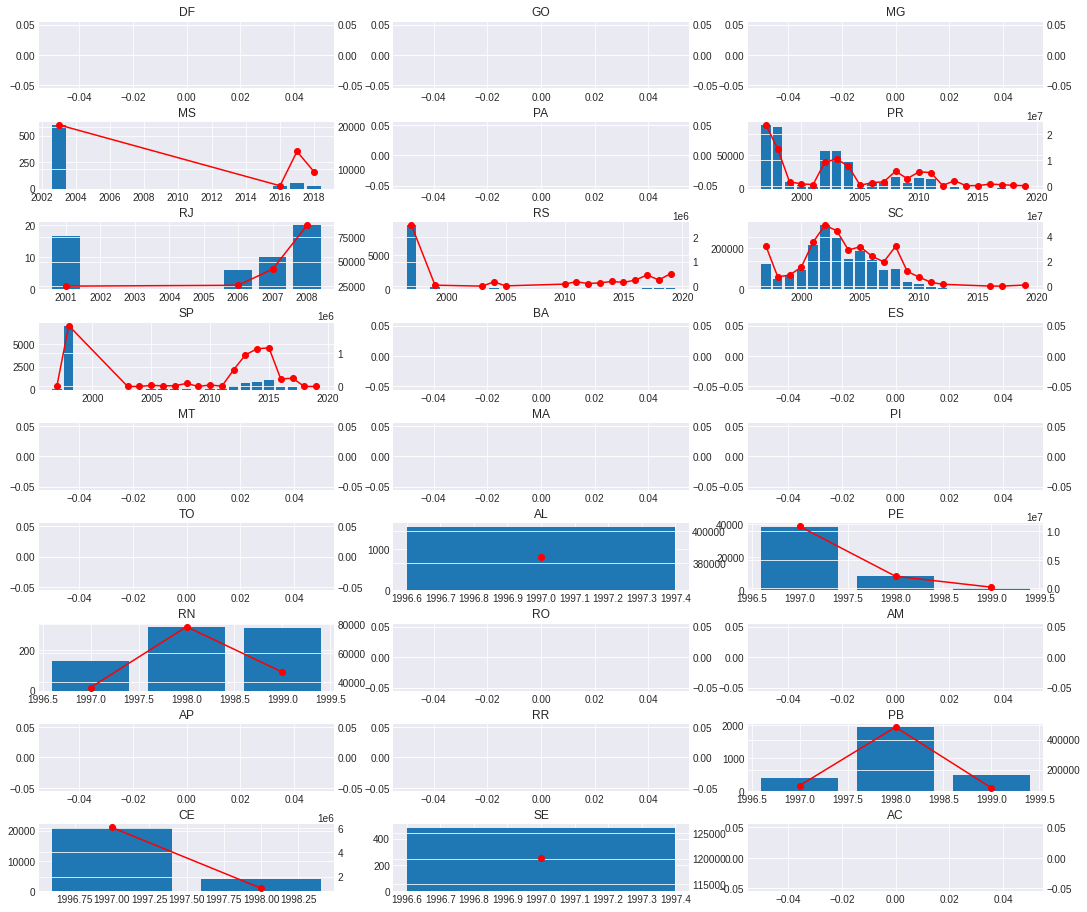

Produto:  soybean_oil


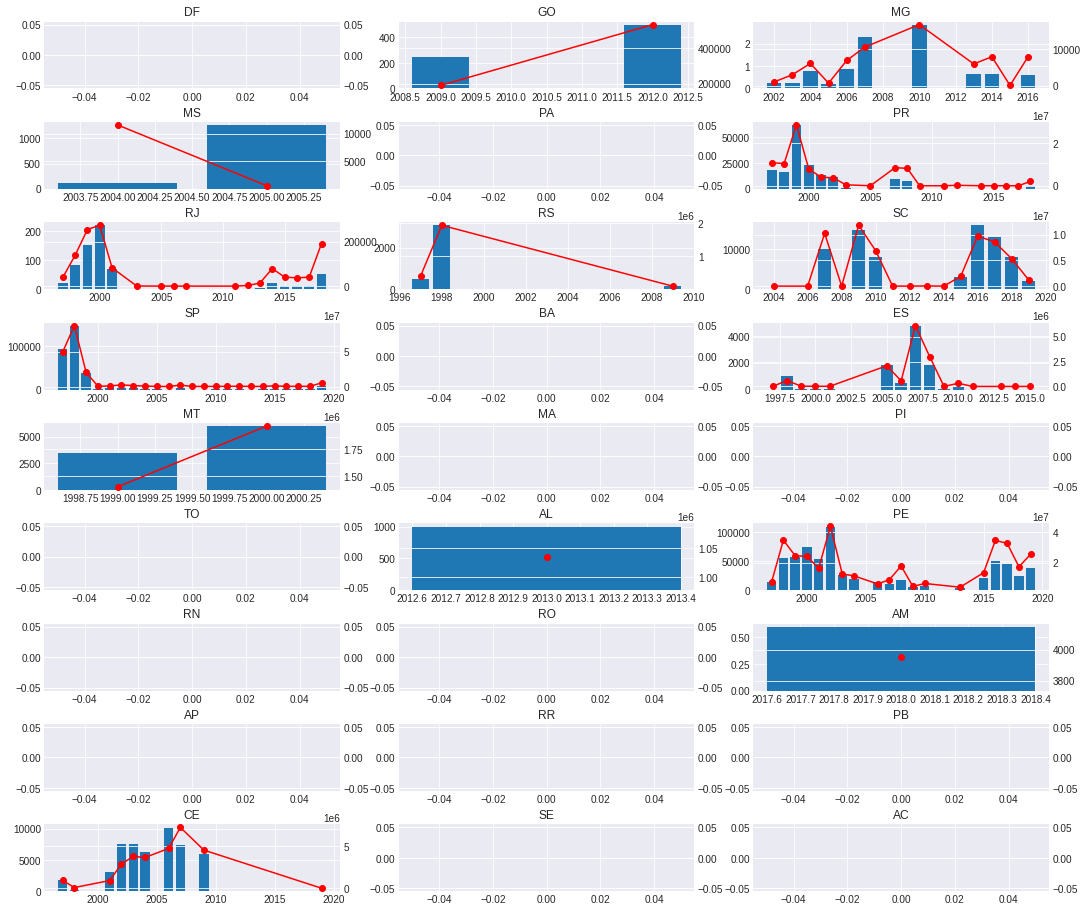

Produto:  soybeans


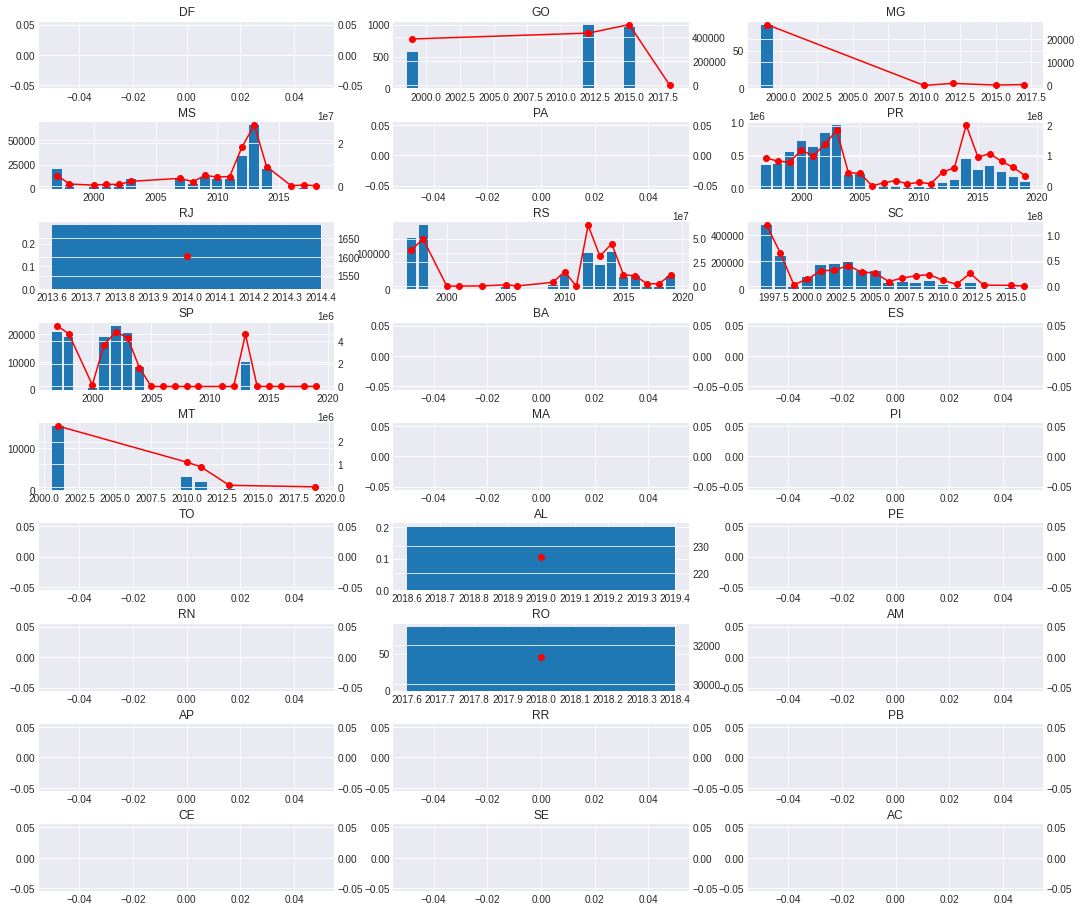

Produto:  sugar


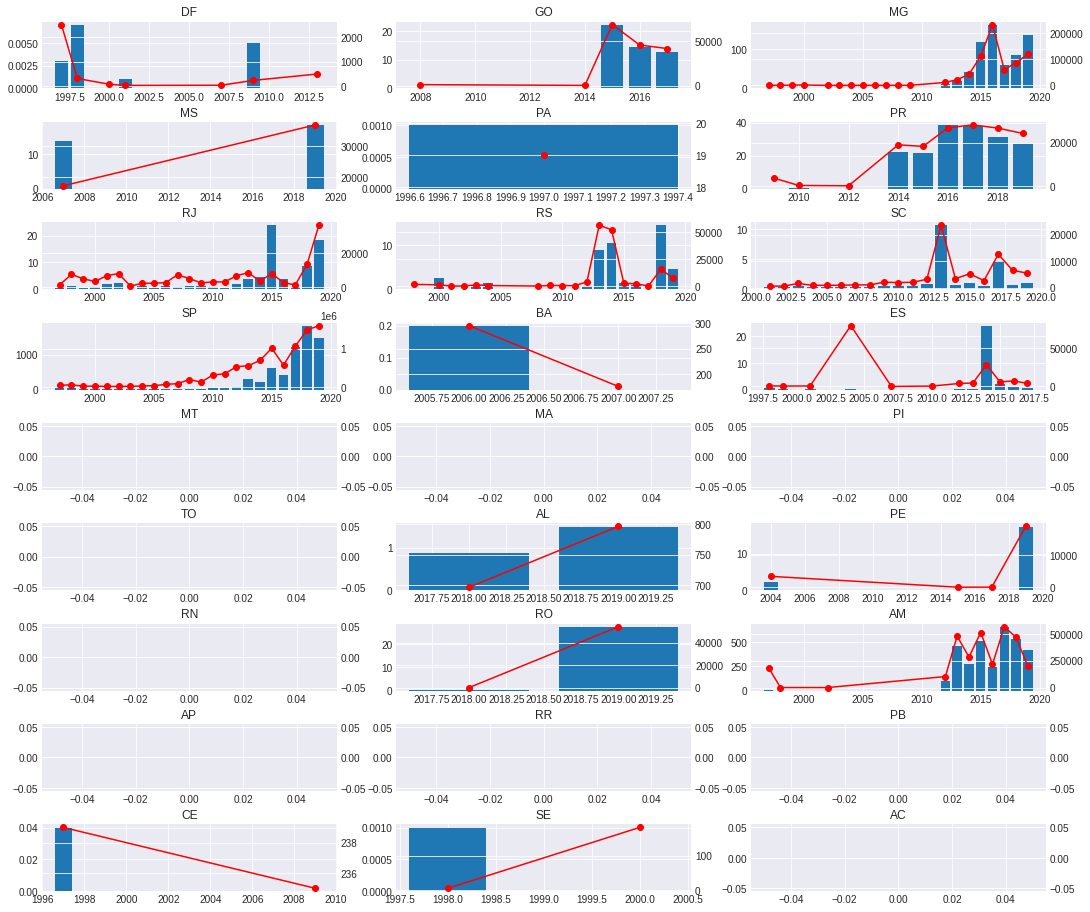

Produto:  wheat


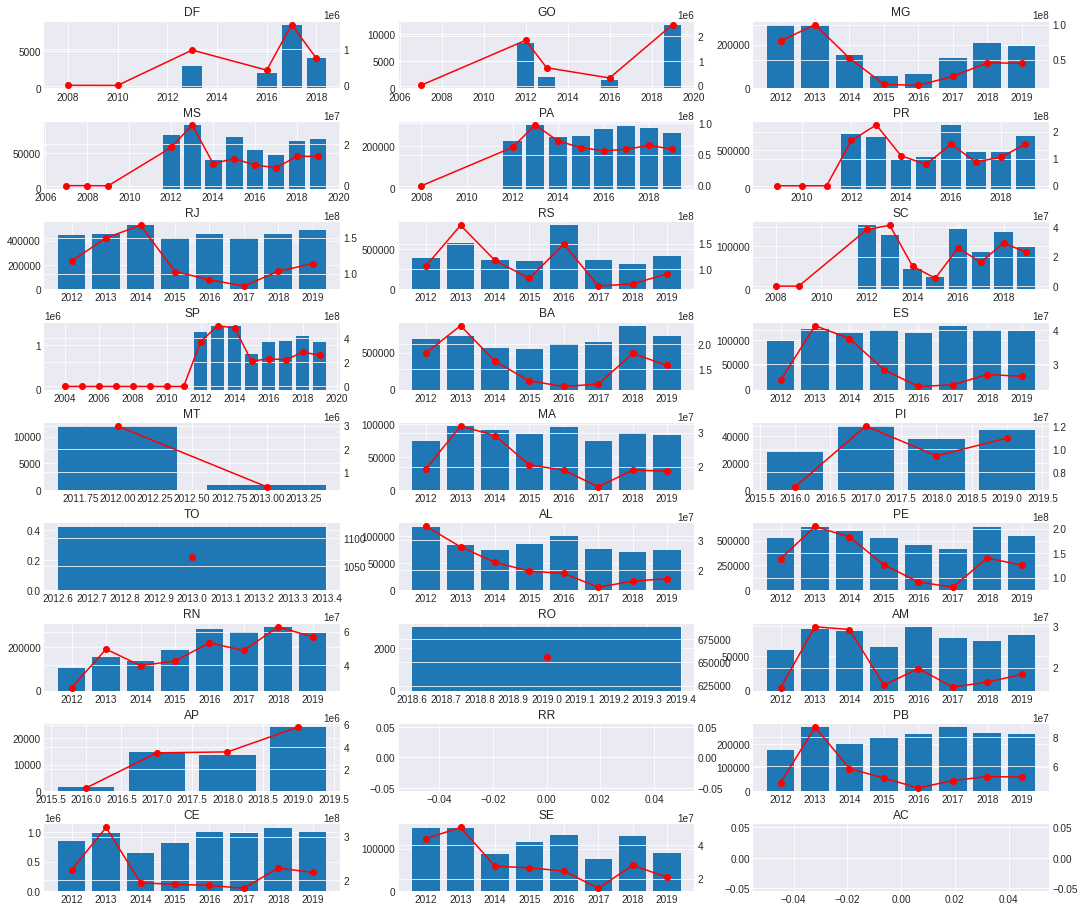

In [88]:
for produto in produtos:
    plot_tons_price(comex_gb_tons_usd_imp, estados, produto)

## Principais destino - Exportação

In [109]:
# Filtrar somente exportação
destino_exp = df_comexstat[df_comexstat['type'] == 'Export']

# Agrupar valores de toneladas e preço - ano, produto, estado e país
destino_exp = destino_exp.groupby(['year','product','state','country'])['tons','usd'].sum().reset_index()

# Ordenar variaveis
destino_exp = destino_exp.sort_values(['year','product','state'])

In [170]:
# Funcao para visualizar principais destino em toneladas
def plot_dest_tons(dataframe, var_iterate, var_filter, var_year,var_rank_top = 5):
    # definir tamanho plot
    plt.figure(figsize=(18,16))
    plt.subplots_adjust(hspace=0.5)
    
    # imprimir produto atual
    print("Produto: ", var_filter)
    print('\n')
    print("Ano: ", var_year)
    print('\n')
    print("Rank: top ", var_rank_top)
    
    # Iteração para visualizar cada estado
    for i,estado in enumerate(var_iterate):

        ax1 = plt.subplot(9,3,i+1)

        current_df = dataframe[(dataframe['state']==estado) &
                                       (dataframe['product']==var_filter) &
                                      (dataframe['year']==var_year)]
        
        current_df = current_df.sort_values(by=['tons'], ascending=False)
        current_df = current_df.iloc[0:var_rank_top,:]

        # Plot bar toneladas
        ax1.bar(current_df.country, current_df.tons)
        
        # Plot line preço - eixo y secundário
        ax2 = ax1.twinx()
        ax2.plot(current_df.country,current_df.usd, 'r-o')
        
        # Titulo = estado
        plt.title(estado)

    plt.show()

Produto:  corn


Ano:  2019


Rank: top  5


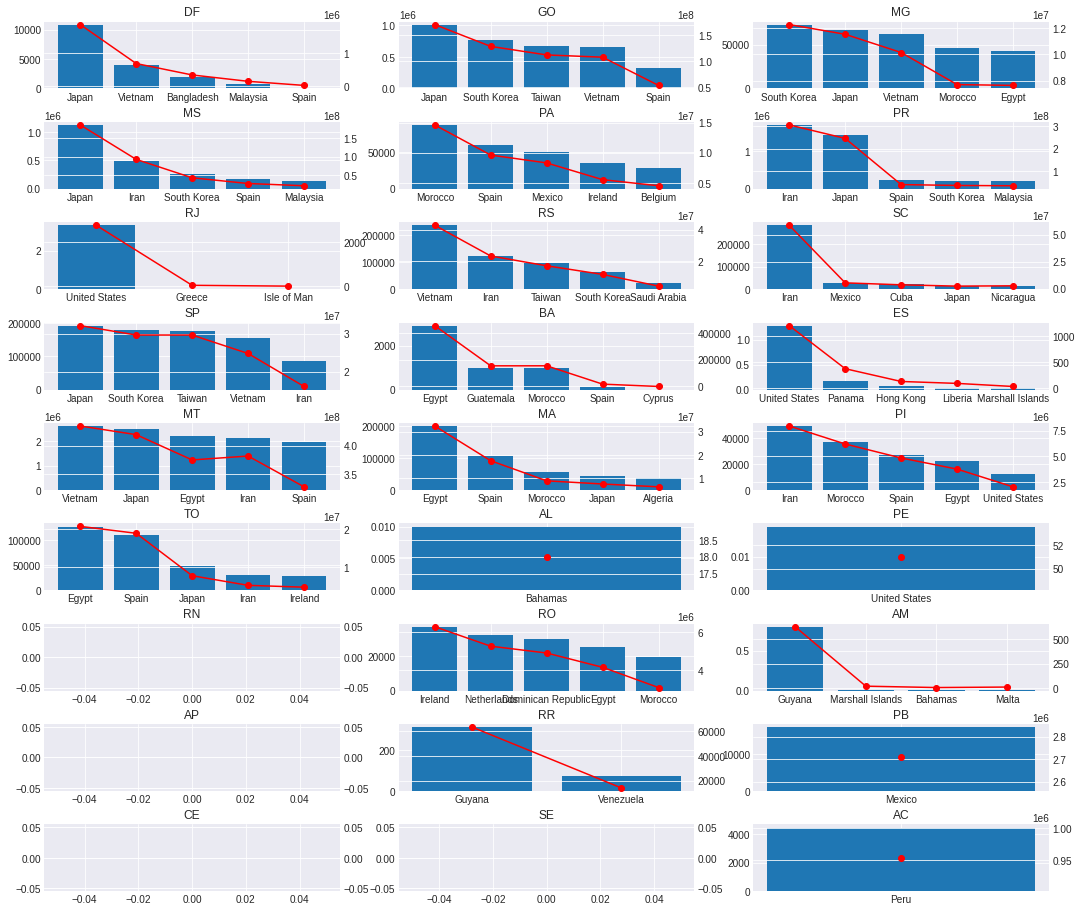

Produto:  soybean_meal


Ano:  2019


Rank: top  5


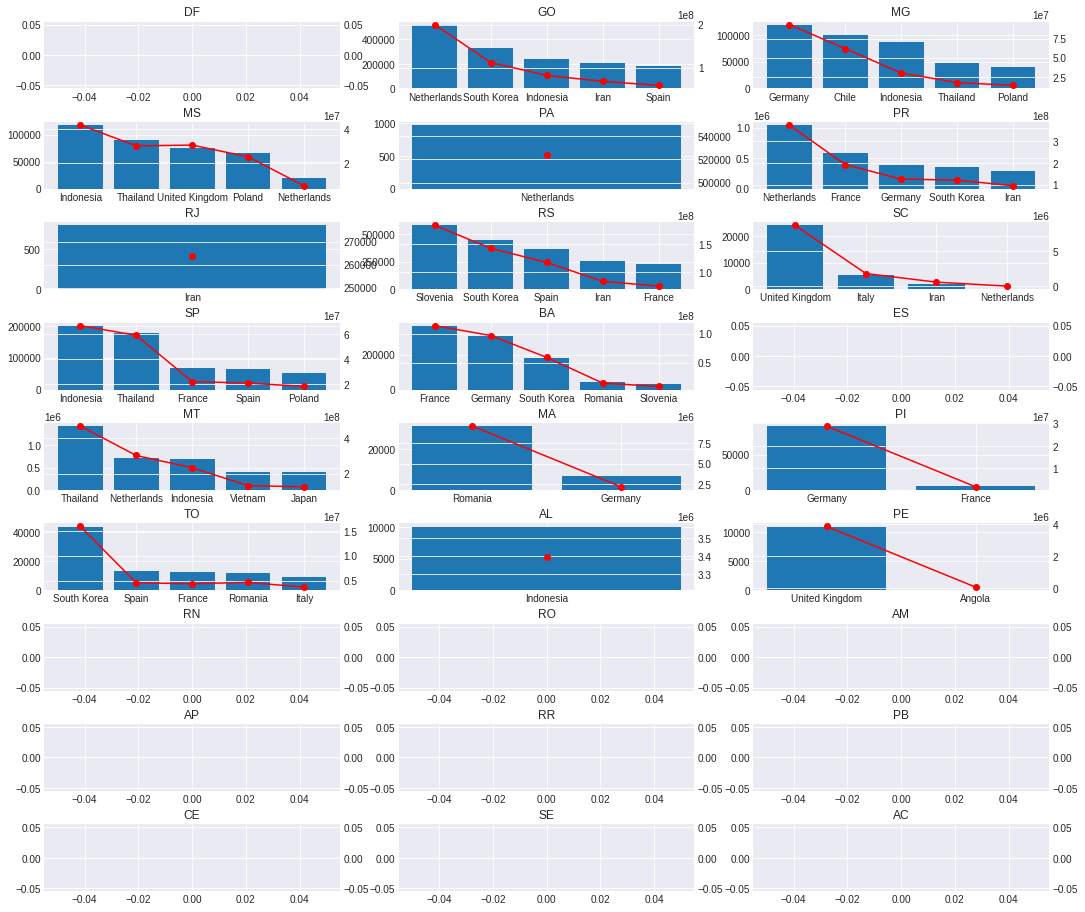

Produto:  soybean_oil


Ano:  2019


Rank: top  5


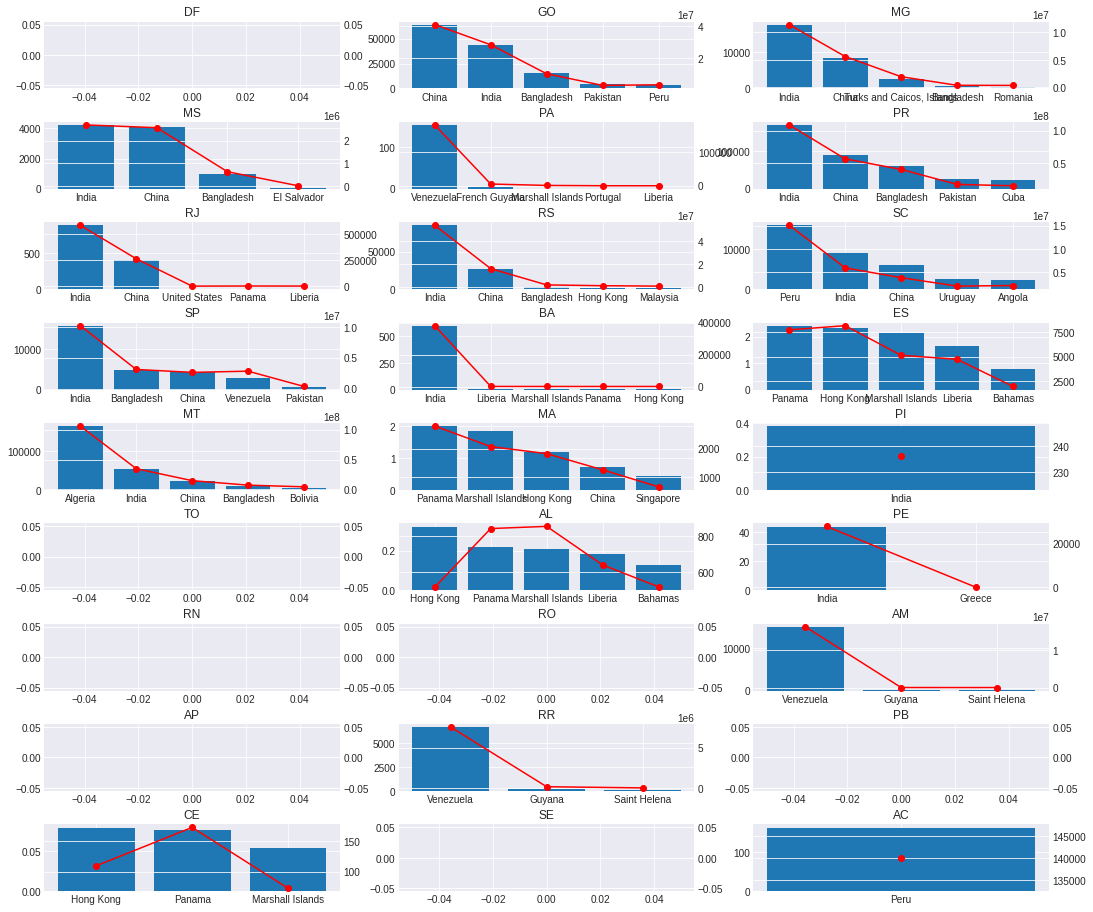

Produto:  soybeans


Ano:  2019


Rank: top  5


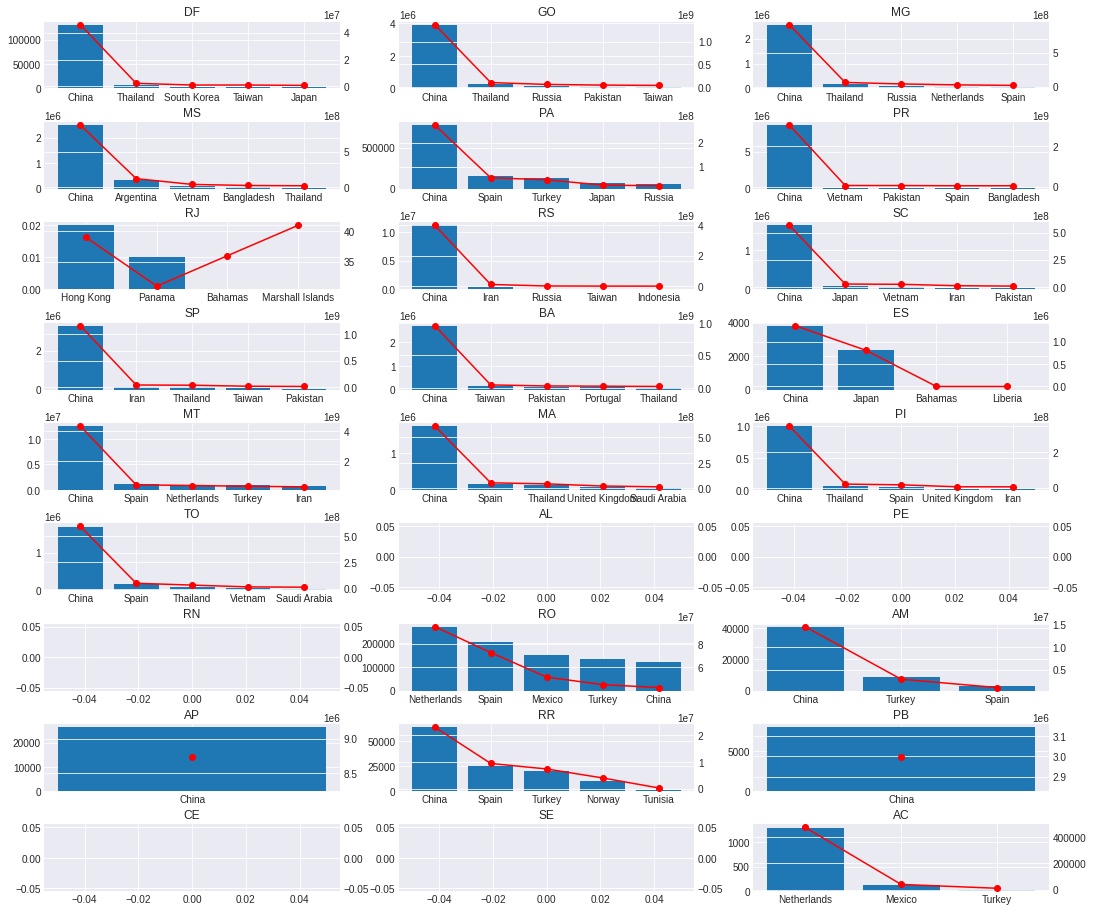

Produto:  sugar


Ano:  2019


Rank: top  5


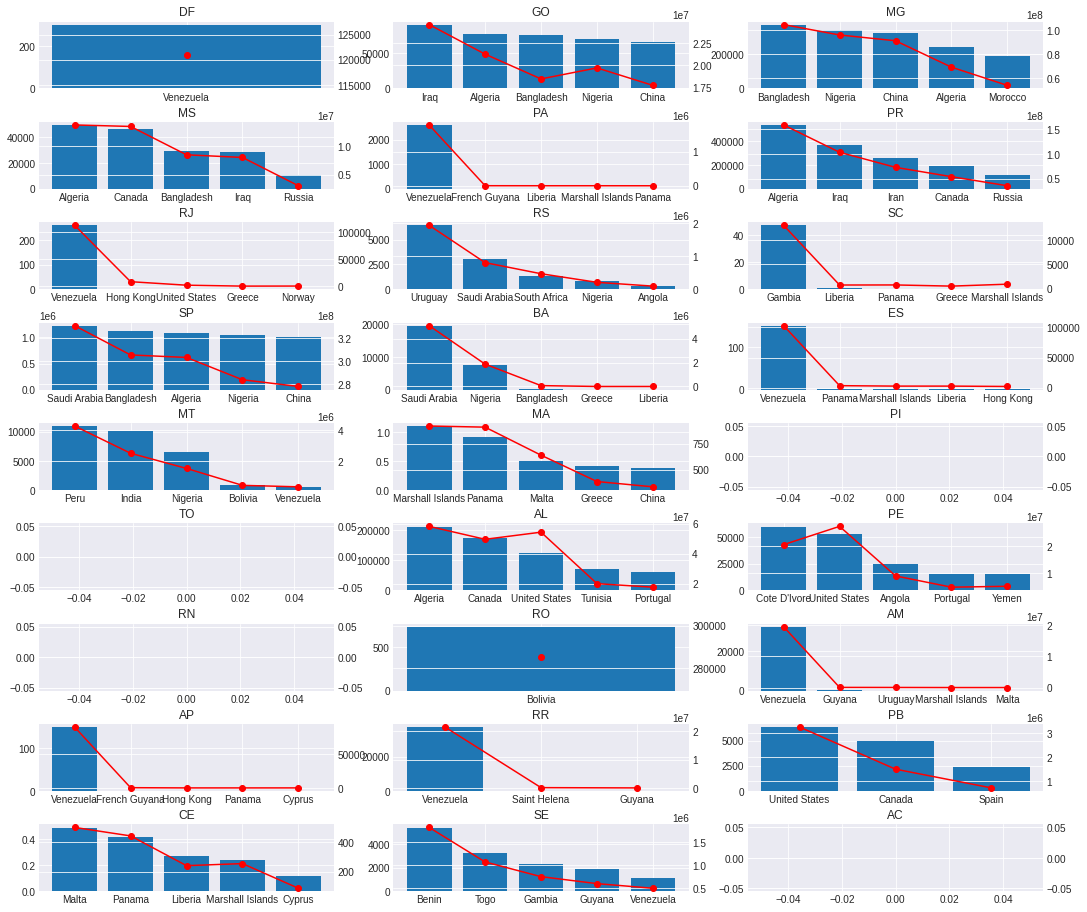

Produto:  wheat


Ano:  2019


Rank: top  5


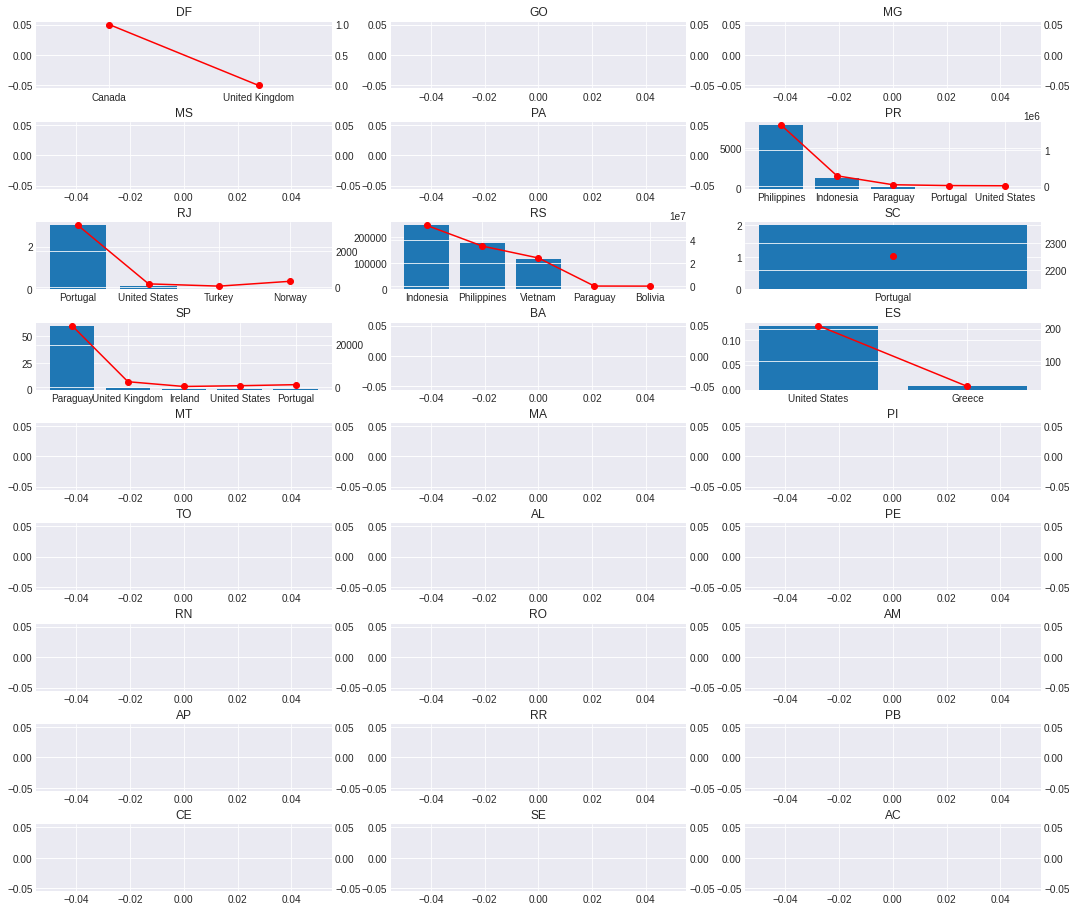

In [171]:
estados = destino_exp['state'].unique()
produtos = destino_exp['product'].unique()

for produto in produtos:
    plot_dest_tons(destino_exp, estados, produto, 2019)